GK Distances between input player and similar players: [10.48808848 11.87434209 12.56980509 18.49324201 19.10497317 26.85144316
 27.22131518]


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


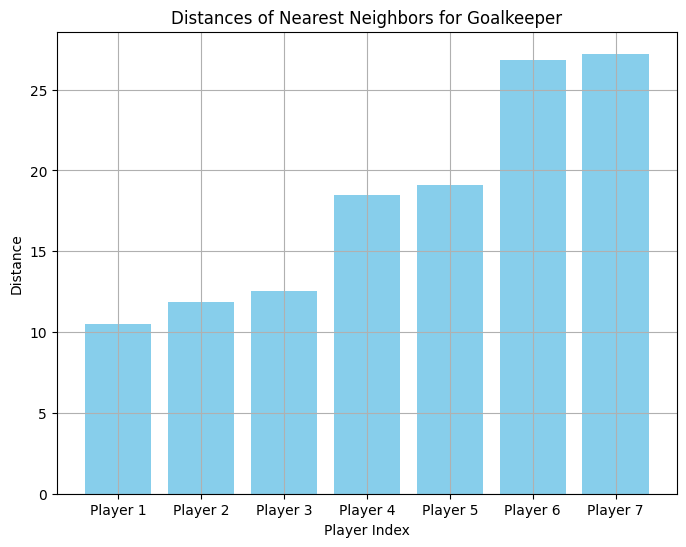

C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


DF Distances between input player and similar players: [ 5.09901951  5.91607978 11.83215957 12.04159458 12.40967365 12.4498996
 18.13835715]


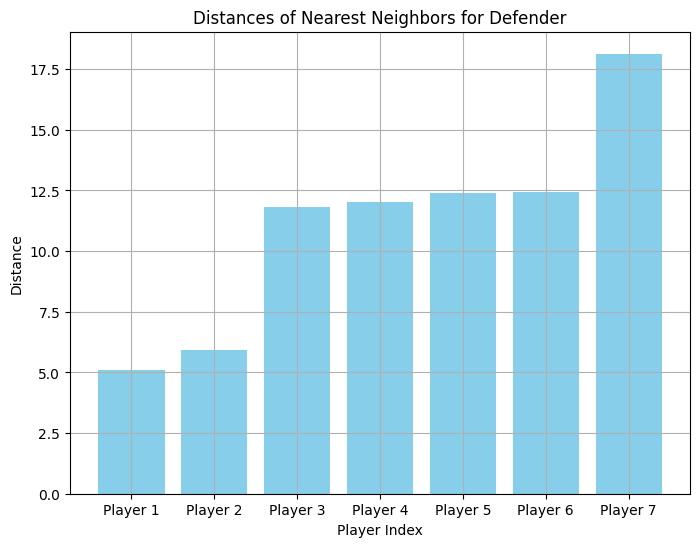

MF Distances between input player and similar players: [3.60555128 4.12310563 4.47213595 4.47213595 5.         5.38516481
 6.70820393]


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


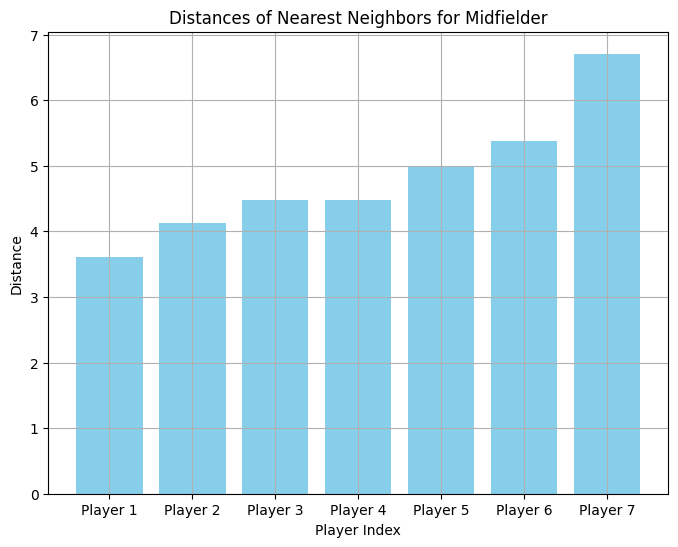

C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


FW Distances between input player and similar players: [1.         6.32455532 6.40312424 7.61577311 8.06225775 8.06225775
 8.06225775]


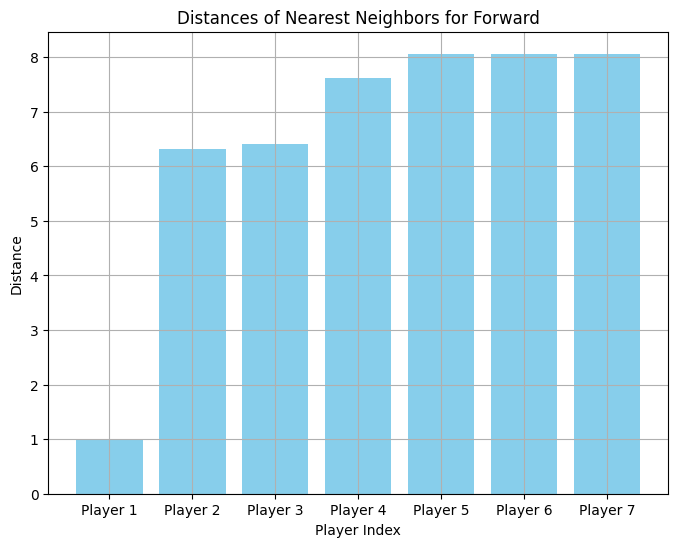

In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 1. โหลดข้อมูลจากไฟล์
data = pd.read_csv('../dataset/EPL-players-stats-2020.csv')

# 2. สร้างคอลัมน์ใหม่ 'Position Group' ให้มีแค่ 4 ตำแหน่งหลัก
def categorize_position(position):
    if position == 'Goalkeeper':
        return 'Goalkeeper'
    elif position == 'Defender':
        return 'Defender'
    elif position == 'Midfielder':
        return 'Midfielder'
    elif position == 'Forward':
        return 'Forward'
    else:
        return 'Unknown'  # ถ้ามีตำแหน่งที่ไม่อยู่ใน 4 ตำแหน่งหลัก

# 3. ใช้ฟังก์ชัน categorize_position กับคอลัมน์ 'Position'
data['Position Group'] = data['Position'].apply(categorize_position)

# 4. กรองข้อมูลเฉพาะนักเตะในแต่ละตำแหน่ง
gk_data = data[data['Position Group'] == 'Goalkeeper']
df_data = data[data['Position Group'] == 'Defender']
mf_data = data[data['Position Group'] == 'Midfielder']
fw_data = data[data['Position Group'] == 'Forward']

# เลือกฟีเจอร์ที่เกี่ยวข้อง
gk_features = gk_data[['Name', 'Club', 'Position', 'Age', 'Clean sheets', 'Saves']]
df_features = df_data[['Name', 'Club', 'Position', 'Age', 'Tackles', 'Duels won', 'Clean sheets']]
mf_features = mf_data[['Name', 'Club', 'Position', 'Age', 'Assists', 'Passes']]
fw_features = fw_data[['Name', 'Club', 'Position', 'Age', 'Goals', 'Shots on target']]

# แทนค่า NaN เป็น 0
gk_features = gk_features.fillna(0)
df_features = df_features.fillna(0)
mf_features = mf_features.fillna(0)
fw_features = fw_features.fillna(0)

# 5. กำหนดจำนวนเพื่อนบ้าน (k) ที่ต้องการค้นหา
k = 7

# Train โมเดล KNN สำหรับแต่ละตำแหน่ง
gk_knn_model = NearestNeighbors(n_neighbors=k)
gk_knn_model.fit(gk_features[['Age', 'Clean sheets', 'Saves']])

df_knn_model = NearestNeighbors(n_neighbors=k)
df_knn_model.fit(df_features[['Age', 'Tackles', 'Clean sheets']])

mf_knn_model = NearestNeighbors(n_neighbors=k)
mf_knn_model.fit(mf_features[['Age', 'Assists']])

fw_knn_model = NearestNeighbors(n_neighbors=k)
fw_knn_model.fit(fw_features[['Age', 'Goals']])

# ฟังก์ชันแสดงระยะทางระหว่างผู้เล่นที่ใกล้เคียงกันในตำแหน่ง Goalkeeper
def gk_find(age, clean_sheets, saves, k=7):
    gk_input_player = [[age, clean_sheets, saves]]
    distances, indices = gk_knn_model.kneighbors(gk_input_player)
    gk_similar_players = gk_features.iloc[indices[0]]
    
    # แสดงระยะทาง (distance) กับผู้เล่นที่คล้ายกัน
    print("GK Distances between input player and similar players:", distances[0])
    
    # พล็อตกราฟระยะทาง
    plot_distances(distances[0], 'Goalkeeper')
    
    return gk_similar_players[['Name', 'Age', 'Club', 'Saves', 'Clean sheets']]

# ฟังก์ชันแสดงระยะทางสำหรับตำแหน่งอื่น ๆ เช่นเดียวกัน
def df_find(age, tackles, clean_sheets, k=7):
    df_input_player = [[age, tackles, clean_sheets]]
    distances, indices = df_knn_model.kneighbors(df_input_player)
    df_similar_players = df_features.iloc[indices[0]]
    
    # แสดงระยะทาง
    print("DF Distances between input player and similar players:", distances[0])
    
    # พล็อตกราฟระยะทาง
    plot_distances(distances[0], 'Defender')
    
    return df_similar_players[['Name', 'Age', 'Club', 'Tackles']]

def mf_find(age, assists, k=7):
    mf_input_player = [[age, assists]]
    distances, indices = mf_knn_model.kneighbors(mf_input_player)
    mf_similar_players = mf_features.iloc[indices[0]]
    
    # แสดงระยะทาง
    print("MF Distances between input player and similar players:", distances[0])
    
    # พล็อตกราฟระยะทาง
    plot_distances(distances[0], 'Midfielder')
    
    return mf_similar_players[['Name', 'Age', 'Club', 'Assists']]

def fw_find(age, goals, k=7):
    fw_input_player = [[age, goals]]
    distances, indices = fw_knn_model.kneighbors(fw_input_player)
    fw_similar_players = fw_features.iloc[indices[0]]
    
    # แสดงระยะทาง
    print("FW Distances between input player and similar players:", distances[0])
    
    # พล็อตกราฟระยะทาง
    plot_distances(distances[0], 'Forward')
    
    return fw_similar_players[['Name', 'Age', 'Club', 'Goals']]

# ฟังก์ชันสำหรับการพล็อตกราฟระยะทาง
def plot_distances(distances, position):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(distances)), distances, color='skyblue')
    plt.xlabel('Player Index')
    plt.ylabel('Distance')
    plt.title(f'Distances of Nearest Neighbors for {position}')
    plt.xticks(range(len(distances)), [f'Player {i+1}' for i in range(len(distances))])
    plt.grid(True)
    plt.show()

# ตัวอย่างการใช้งาน: แสดงระยะทางระหว่างนักเตะที่ใกล้เคียงกัน
age_gk = 27
clean_sheet_gk = 15
saves = 70
similar_goalkeeper = gk_find(age_gk, clean_sheet_gk, saves)

age_df = 28
tackle_df = 150
clean_sheet_df = 15
similar_defender = df_find(age_df, tackle_df, clean_sheet_df)

age_mf = 28
assists_mf = 30
similar_midfielder = mf_find(age_mf, assists_mf)

age_fw = 24
goal_fw = 50
similar_forwards = fw_find(age_fw, goal_fw)
